In [1]:
# Must run another "shift enter" run to complete the imports
# Science imports
import pandas as pd
import numpy as np

# Viz imports
import matplotlib.pyplot as plt
import seaborn as sns

# Config matplotlib
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True # in matplotlib, edge borders are turned off by default.
sns.set_style("darkgrid") # set a grey grid as a background

# ML imports
import sklearn
from sklearn import metrics
# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Logistic Regression
#
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# turn off warnings
import warnings
warnings.filterwarnings('ignore')


In [9]:
data = pd.read_csv('COVID19_open_line_list.csv')

In [10]:
data.head(3)

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data.drop(['Unnamed: '+str(x) for x in range(33,45)],axis=1,inplace=True) #deletes unnecessary columns

In [12]:
data.head(3)

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,...,NaN,NaN,NaN,NaN,Chaohu City,Hefei City,Anhui,China,340181,NaN
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,...,NaN,NaN,NaN,NaN,Baohe District,Hefei City,Anhui,China,340111,NaN
2,3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN


In [63]:
data['outcome'].nunique()

12

In [67]:
data['outcome'].dropna().unique()

array(['discharged', 'discharge', 'died', 'Discharged', '05.02.2020',
       'death',
       'Symptoms only improved with cough. Currently hospitalized for follow-up.',
       'recovered', 'stable',
       'critical condition, intubated as of 14.02.2020',
       'treated in an intensive care unit (14.02.2020)', 'severe'],
      dtype=object)

In [61]:
data[data['outcome'].apply(clean)=='death']['age'].apply(apply_int).dropna()

185      39.0
1426     82.0
4800     44.0
5050     73.0
11219    77.0
11220    78.0
11222    68.0
11800    60.0
Name: age, dtype: float64

In [70]:
data[data['outcome'].apply(clean)=='recovered']['age'].apply(apply_int).dropna().mean()

45.0

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14126 entries, 0 to 14125
Data columns (total 33 columns):
ID                          13173 non-null float64
age                         1349 non-null object
sex                         1264 non-null object
city                        10194 non-null object
province                    12906 non-null object
country                     13148 non-null object
wuhan(0)_not_wuhan(1)       13170 non-null float64
latitude                    13147 non-null float64
longitude                   13147 non-null float64
geo_resolution              13147 non-null object
date_onset_symptoms         746 non-null object
date_admission_hospital     730 non-null object
date_confirmation           13089 non-null object
symptoms                    493 non-null object
lives_in_Wuhan              565 non-null object
travel_history_dates        503 non-null object
travel_history_location     758 non-null object
reported_market_exposure    35 non-null object
addi

In [21]:
data['outcome'].unique()

array([nan, 'discharged', 'discharge', 'died', 'Discharged', '05.02.2020',
       'death',
       'Symptoms only improved with cough. Currently hospitalized for follow-up.',
       'recovered', 'stable',
       'critical condition, intubated as of 14.02.2020',
       'treated in an intensive care unit (14.02.2020)', 'severe'],
      dtype=object)

In [22]:
def clean(x):
    if x == 'death' or x == 'died' or x == 'Death':
        return 'death'
    elif x == 'discharged' or x=='discharge':
        return 'discharge'
    elif x == 'recovered' or x=='stable':
        return 'recovered'
    else:
        return np.nan

In [23]:
def apply_int(x):
    try:
        y = int(x)
        return y
    except:
        return np.nan

In [38]:
deathAge=data[data['outcome'].apply(clean)=='death']['age'].apply(apply_int).dropna()

In [43]:
outcomeDischarge = data[data['outcome'].apply(clean)=='discharge']['age'].apply(apply_int).dropna()


In [44]:
outcomeRecovered = data[data['outcome'].apply(clean)=='recovered']['age'].apply(apply_int).dropna()


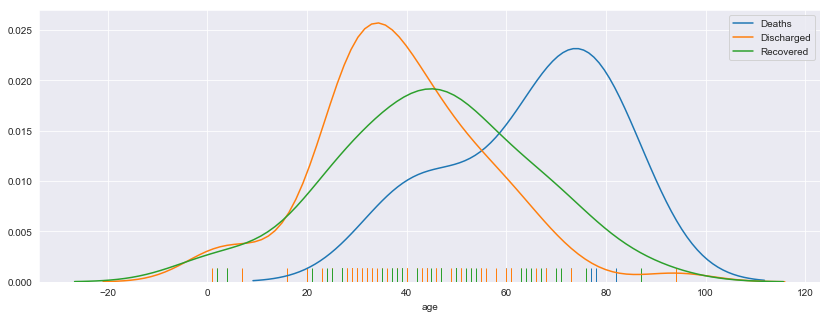

In [52]:

plt.figure(figsize=(14,5))

#sns.distplot(data[data['outcome'].apply(clean)=='death']['age'].apply(apply_int),hist=False,rug=True,label='Deaths')
sns.distplot(deathAge,hist=False,rug=True,label='Deaths')
#sns.distplot(data[data['outcome'].apply(clean)=='discharge']['age'].apply(apply_int),hist=False,rug=True,label='Discharged')
sns.distplot(outcomeDischarge,hist=False,rug=True,label='Discharged')
#sns.distplot(data[data['outcome'].apply(clean)=='recovered']['age'].apply(apply_int),hist=False,rug=True,label='Recovered')
sns.distplot(outcomeRecovered,hist=False,rug=True,label='Recovered')
plt.legend()
plt.show()

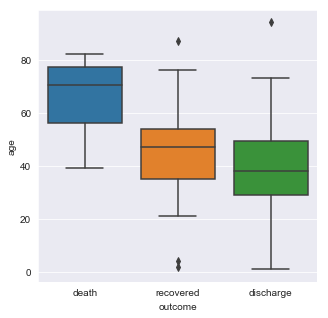

In [53]:
df1 = pd.DataFrame(data[data['outcome'].apply(clean)=='death']['age'].apply(apply_int)).assign(outcome='death')
df3 = pd.DataFrame(data[data['outcome'].apply(clean)=='discharge']['age'].apply(apply_int)).assign(outcome='discharge')
df2 = pd.DataFrame(data[data['outcome'].apply(clean)=='recovered']['age'].apply(apply_int)).assign(outcome='recovered')
cdf = pd.concat([df1, df2, df3])
plt.figure(figsize=(5,5))
sns.boxplot(x="outcome", y="age", data=cdf)  # RUN PLOT   
plt.show()

In [62]:
data[data['outcome'].apply(clean)=='death']['age'].apply(apply_int) .mean()

65.125

In [ ]:
data[data['outcome'].apply(clean)=='']['age'].apply(apply_int) .mean()

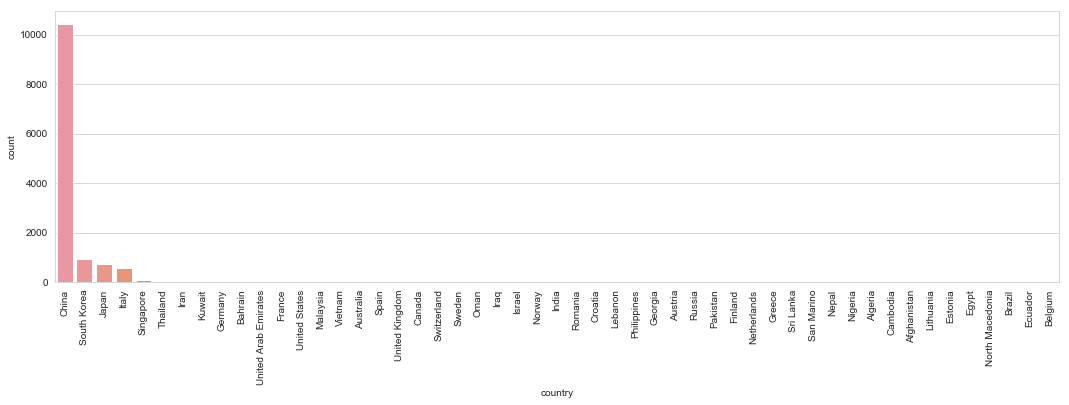

In [68]:
fig = plt.figure(figsize=(18,5))
sns.set_style('whitegrid')
sns.countplot(data['country'],order=data['country'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

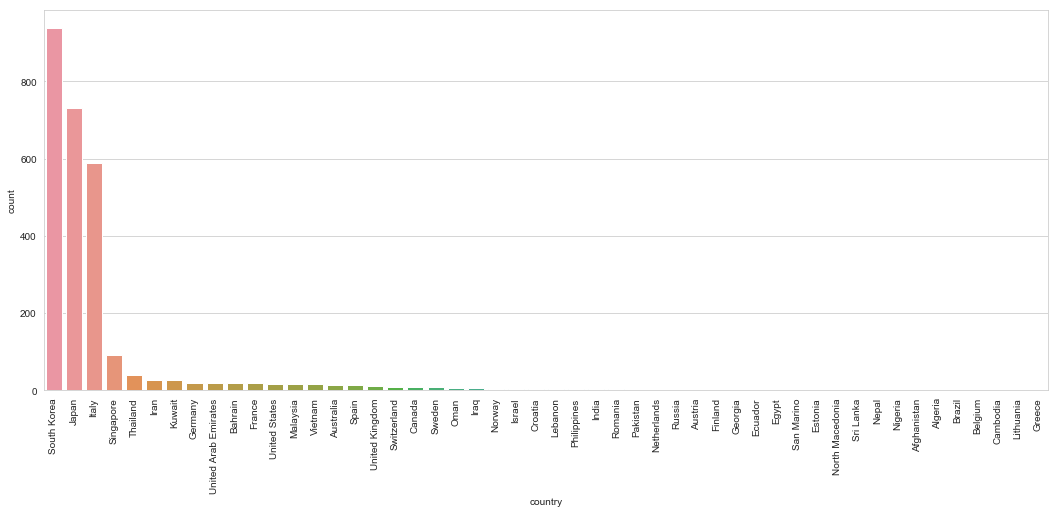

In [71]:
fig = plt.figure(figsize=(18,7))
sns.set_style('whitegrid')
sns.countplot(data[data['country'] != 'China']['country'],order=data[data['country'] != 'China']['country'].value_counts().index)
plt.xticks(rotation=90)
plt.show()